---
title: 'Лабораторна робота 1. Робота з OpenCV у середовищі Anaconda'
description:
   Документ зроблено за допомогою [Quarto](https://quarto.org/)
author: "&copy; [<span style='color: blue;'>Tereshchenko Daniil </span>](https://github.com/whytereshchenko/Tereshchenko_OpenCV), 2023"
date: "12.10.2023"
lang: ukr
format:
  html:
    code-fold: true
    toc: true # меню
    toc_float: # спливаюче меню  
      collapsed: true # авто
      number_sections: true
jupyter: python3
---

__Мета:__ _quick start для роботи з бібліотекою з відкритим кодом для комп'ютерного зору та обробки зображень OpenCV у середовищі Anaconda із застосуванням Jupyter Notebook засобами мови програмування Python._

::: callout-note
## Примітка
Попередньо потрібно опрацювати лекцію 7.
:::

## Що ви будете вміти?

* Інсталювати дистрибутив Python Anaconda.
* Налаштовувати віртуальне середовище за допомогою системи управління віртуальним середовищем Conda для Windows.
* Інсталювати OpenCV та допоміжні бібліотеки.
* Створювати у середовищі Jupyter Lab (або Jupyter Notebook) з використанням видавничої системи Quarto інтерактивні документи на кшталт того, який ви наразі читаєте.
* Здійснювати імпорт/експорт забраження для подальшої обробки.

## Налаштування віртуального середовища

"[Anaconda](https://uk.wikipedia.org/wiki/Anaconda_(Python_distribution)) -- це вільно та відкрито розповсюджуваний (freemium) дистрибутив різних програмних продуктів, зокрема, мов програмування Python та R. Платформа спеціалізується на "наукових обчисленнях" (scientific computing): наука про дані, застосуванні методів машинного навчання, широкомасштабна обробка даних, передбачувальна аналітика тощо. Використання платформи має на меті спрощення управління пакетами та їх розгортання. __Версіями пакетів керує система управління пакетами [Conda](https://conda.io/en/latest/)__. Дистрибутив Anaconda використовується понад 15 мільйонами користувачів і містить більше 1500 популярних пакетів наукових даних, придатних для Windows, Linux та MacOS, наприклад, NumPy, SciPy та Ggplot2" [1].  
Важливою складовою збірки Anaconda є пакет [Jupyter](https://jupyter.org/), зокрема Jupyter Lab та Jupyter Notebook -- вебзастосунки з відкритим кодом, які дозволяють створювати та обмінюватися документами, що містять живий код, рівняння, візуалізацію та текст. Використання включає: очищення та трансформацію даних, чисельне моделювання, статистичне моделювання, візуалізація даних, машинне навчання та багато іншого.  
Чому саме збірка Anaconda зі своєю екосистемою буде використовуватися нами як інструмент для обробки зображень?    

* тому що обробка зображень в рамках нашого курсу розглядається як складова частина препроцессінгу для задач _комп'ютерного зору_ (Computer Vision);
* _комп'ютерний зір_ -- це сфера інформаційних технологій, яка має безпосереднє відношення до _машинного навчання_;
* екосистема Anaconda є найпоширенішим інструментом, стандартом "де-факто", для задач машинного навчання у сферах Artifical Intelligence та Data Science.  

Тому, в цій лабораторній роботі покроково відпрацьовуються наступні питання:

* нсталяція дистрибутива Python Anaconda для Windows;
* налаштовування віртуального середовища за допомогою системи управління віртуальним середовищем Conda, яка входить до складу Anaconda, для роботи з OpenCV;  
* інсталювання бібліотеки OpenCV та допоміжних пакетів у настроєне віртуальне середовище для подальшої роботи.

### Інсталяція дистрибутива Python Anaconda

1. [Завантажуємо](https://www.anaconda.com/) Anaconda.
1. Встановлюємо Anaconda згідно з [інструкцією](https://www.machinelearningmastery.ru/setup-python-environment-machine-learning-deep-learning-anaconda/).
1. Запускаємо і обновляємо Anaconda.  

Anaconda поставляється з набором графічних інструментів під назвою Anaconda Navigator. Ви можете запустити Anaconda Navigator, відкривши його з панелі запуску додатків. Anaconda Navigator дозволяє інсталювати та обновляти пакети, настроювати та управляти віртуальним середовищем тощо. Про Anaconda Navigator детально можна дізнатися [тут](https://docs.continuum.io/anaconda/navigator/).  
Однак, тут ми розглянемо роботу з Conda через інтерфейс командного рядка, який дозволить краще зрозуміти суть даного інстурменту і роботу з ним.  

Перевіряємо версію `conda`:

`conda -V`  

Аналогічно перевіряємо версію `Python`:  

`python -V`  

Для того, щоб перевірити більш загально інформацію, яка, зокрема включає ввод версій інтерпрета та інформацію стосовно віртуального середовища тощо.

Якщо `conda` і `python` встановлені коректно ми маємо побачити їх версії. Пісдя цього необхідно виконати апгрейд середовища за допомогою наступним команд:  

`conda update conda`  
`conds update anaconda`  

або за допомогою загальної команди:  

`conda update --all`  

В процесі цього програма може запропонувати обновити певні пакети.  
Після успішного виконання цих операцій можна перейти до налаштування віртуального середовища, в якому ми будемо встановлювати всі необхідні пакети для роботи з зображеннями.

### Налаштування віртуального середовища за допомогою Conda

Слід зазначити, що з консолі можна встановлювати пакети `Python` двома способами:  
* за допомогою менеджера пакетів [pip](https://pypi.org/project/pip/), що входить до складу інсталяції python;  
* за допомогою conda.  

Слід зазначити, що на відміну від `pip`, який є менеджером пакетів, `conda` є програмою більш високого рівня, яка, окрім функцій менеджера пакетів, забезпечує функції управління віртуальним середовищем.  
Базова версія `Python` містить у совєму складі інструмент для створення віртуальних середовищ `Virtualenv`. Варіант налаштування віртуального середовища за допомогою `Virtualenv` можна подивитися, наприклад, [тут](https://habr.com/ru/sandbox/131393/).  
`Conda` включає власний менеджер середовища і дає деякі переваги щодо `Virtualenv`. Крім того, середовища `Conda` повністю сумісні з базовими пакетами мови `Python`, які можуть бути встановлені за допомогою `pip`.  
Тому робота з `Conda` у цьому плані є більш ефективною. Продемонструєм це на прикладі, налаштувавши віртульне середовище для роботи з `OpenCV`.  

Для того,щоб продивитися перелік доступних віртуальних середовищ можна скористатися командою:  

`conda env list`

Створимо середовище з іменем `myenv`:

`conda create --name myenv`


Виконавши повторно команду `conda env list`, можна впевнитися, чи було створене відповідне середовище. Якщо операція пройшла успішно, можна зробити його активним (активне середвище у списку команди `list` позначається зірочкою, а напочатку командного рядка його ім'я вказуэться у дужках.  
Для активації необхдно виконати наступну команду:

`conda activate myenv`


Деактивація активного середовища виконується за допомогою команди `conda deactivate`, або просто `deactivate`.  

У разі виникнення потреби видалити певне віртуальне середовище, необхідно виконати наступну команду:

`conda remove --name <ім'я середовища> --all`

Тепер у створеному віртуальному середовищи можна встановити необхідні пакети необхідних версій, у тому числі, потрібну версію інтерпретатора `Python`. Більш детально про це можна подивится, наприклад, [тут](https://proglib.io/p/ml-python-setup/).

### Інсталювання бібліотеки OpenCV та допоміжних пакетів

Перелік встановлених пакетів `conda` можна за допомогою команди 

`conda list`

в результаті чого, на екран буде виведено список пакетів активного середовища.

Пакети встановлюються з репозиторіїв, званих __channels by Conda__. Щоб виконати пошук певного пакета, запустіть пошук <package name> 
    
`conda search openCV`
    
Щоби встановити пакет необхідно запустити команду
    
`conda install <package name>`
    
Іноді ви не зможете знайти потрібні вам пакети на базових каналах. Детально про це та нюанси щодо пошуку, оновлення та видалення пакетів можна прочитати, наприклад, [тут](https://proglib.io/p/ml-python-setup/).
    
Іноді під час налаштування `Python` для машинного навчання нам можуть знадобитися чисті пакети `Python`, які будуть недоступні на каналах `Conda`. У цьому випадку можна скористатися `pip`. Наприклад, так ми встановлюємо `OpenCV`:  

`pip install opencv-python`  

Натомість потрібні нам пакети для роботи з матрицями та для математичних обчислееь і візуалізації результатів `numpy` та `matplotlib` можна встановити так: 
    
`conda install numpy`  
`conda install matplotlib` 
    


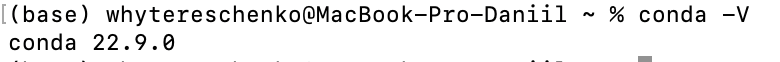
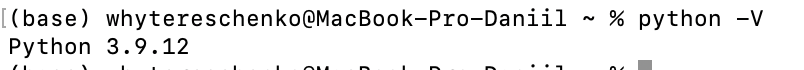
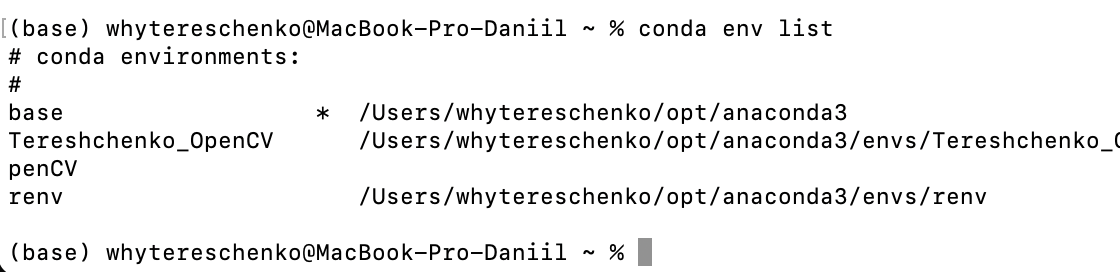
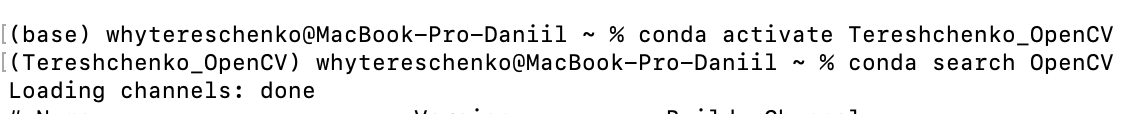
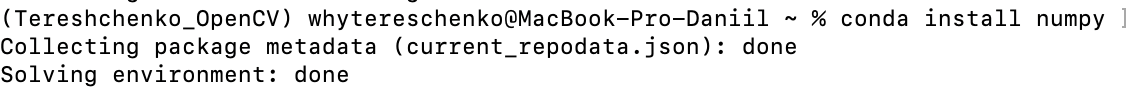
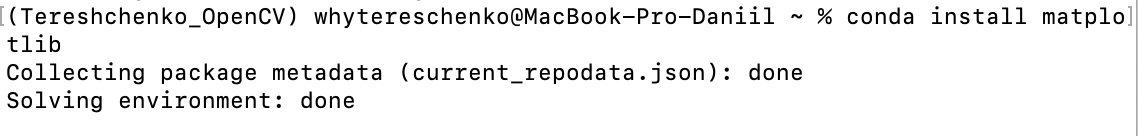

### Створення Notebook-документа

Для подальшої роботи необхідно завантажити `Anaconda Navigator` і в його середовищі вибрати зі списку доступних віртуальих середовищ потрібне віртуальне середовище (у нашому випадку `myenv`) і активувати його. Потім створити робочий Notebook-документа, так званий "зошит" `ipython`, в якому можна завантажити потрібні  для роботи бібліотеки і писати код.  
Як створити Notebook-документ за допомогою Jupyter Notebook і як з ним працювати можна подивитися [тут](https://devpractice.ru/python-lesson-1-install/), [тут](https://devpractice.ru/python-lesson-6-work-in-jupyter-notebook/) і [тут](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html)  


### Підключення бібліотек, імпорт/експорт забраження у Notebook-документ

In [1]:
# Імпортуємо пакети
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
# import opencv
print('version cv2: %s' % cv.__version__)
# або так
# print(f'version cv2: {cv.__version__}')

version cv2: 4.6.0


### Імпорт зображення. Деталі зображення

In [6]:
# Завантажуємо RGB-зображення та виводимо його характеристики
# 960 × 1306

image = cv.imread('me.png')
# img = cv.imread('rose.png', cv.IMREAD_GRAYSCALE)
# img
print(f'Shape/Dimensions: {image.shape}')
print(f'Number of pixel: {image.size}')

Shape/Dimensions: (1306, 960, 3)
Number of pixel: 3761280


### Розділення зображення на канали. Напівтонове зображення

Робочі посилання: [1](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html), 

In [ ]:
blue, green, red = cv.split(image) # Split the image into its channels
img_gs = cv.imread('me.png', cv.IMREAD_GRAYSCALE) # Convert image to grayscale
# img_gs = cv.imread('rose.png', 0)

#Візуалізація зображення 
cv.imshow('me', me_gs)
cv.waitKey(0)
cv.destroyAllWindows()
# Запис зображення на диск
cv.imwrite('me_s.png', me_gs)

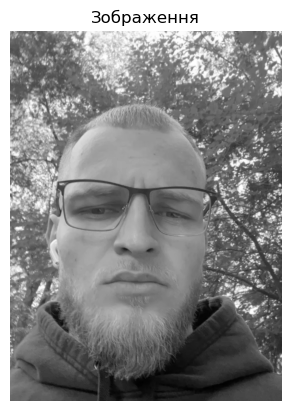

True

In [2]:
# Візцалізація ззасобами matplotlib
import matplotlib.pyplot as plt
import cv2

# Завантажте зображення за допомогою OpenCV
image = cv2.imread('me.png', cv2.IMREAD_GRAYSCALE)

# Перевірте, чи зображення було завантажено успішно
if image is not None:
    # Візуалізація зображення за допомогою Matplotlib
    plt.imshow(image, cmap='gray')  # Встановлення колірної мапи на "сірий" для зображень у відтінках сірого
    plt.title('Зображення')
    plt.axis('off')  # Вимкніть вісі x та y
    plt.show()
else:
    print('Не вдалося завантажити зображення.')

# Запис зображення на диск за допомогою OpenCV
cv2.imwrite('me_s.png', image)


## Завдання для самостіної роботи

1. Завантажити і встановити збірку `Python Anaconda`.

1. Через інтерфейс командного рядка налаштувати за допомогою `conda` віртуальне середовище з ім'ям `<StudentLastName>_OpenCV`. Етапи роботи підтвердити скріншотами.

1. Проінсталювати в створене середовище пакети, необхідні для роботи з `OpenCV`.

1. Створити Notebook-документ `<lab_1_StudentLastName>` за допомогою Jupyter Notebook. (Див. [тут](https://devpractice.ru/python-lesson-1-install/), [тут](https://devpractice.ru/python-lesson-6-work-in-jupyter-notebook/) і [тут](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html)).

1. Відобразити в робочому документі ("зошиті" ipython) виконання пунктів 1-3 індивідуального завдання.

1. Сфотографувати __себе__ на камеру і виконати імпорт і візуалізацію кольорового та напівтонового зображення у робочий документ.

1. Виконати переведення кольорового зображення у напівтонове і записати його на диск.

1. Робочий документ оформити у вигляді Notebook-документу (файл __.ipynb__).

1. Дати відповіді на контрольні запитання.

1. Скомпілювати звіт у форматі __.html__. Для цього необхідно завантажити термінал і у командному рядку запустити наступну команду:

`jupyter nbconvert lab_1_StudentLastName.ipynb --to html`

10. Проект розмістити у власному репозиторії на GitHub (посилання на нього вказати у відповіді на завдання на krnu.org). Проект має складатися мінімум з двох файлів: `lab_1_StudentLastName.ipynb` та `lab_1_StudentLastName.html`

## Контрольні запитання

1. Що таке `pip` і `conda` та чим вони відрізняються між собою?
- conda може встановлювати бібліотеки, які не є Python-пакетами, і може створювати ізольовані середовища для різних проектів. pip працює лише з Python-пакетами і не управляє середовищами

2. Як буде виглядати виконання пунктів 1-3 індивідуального завдання за допомогою `Virtualenv`?

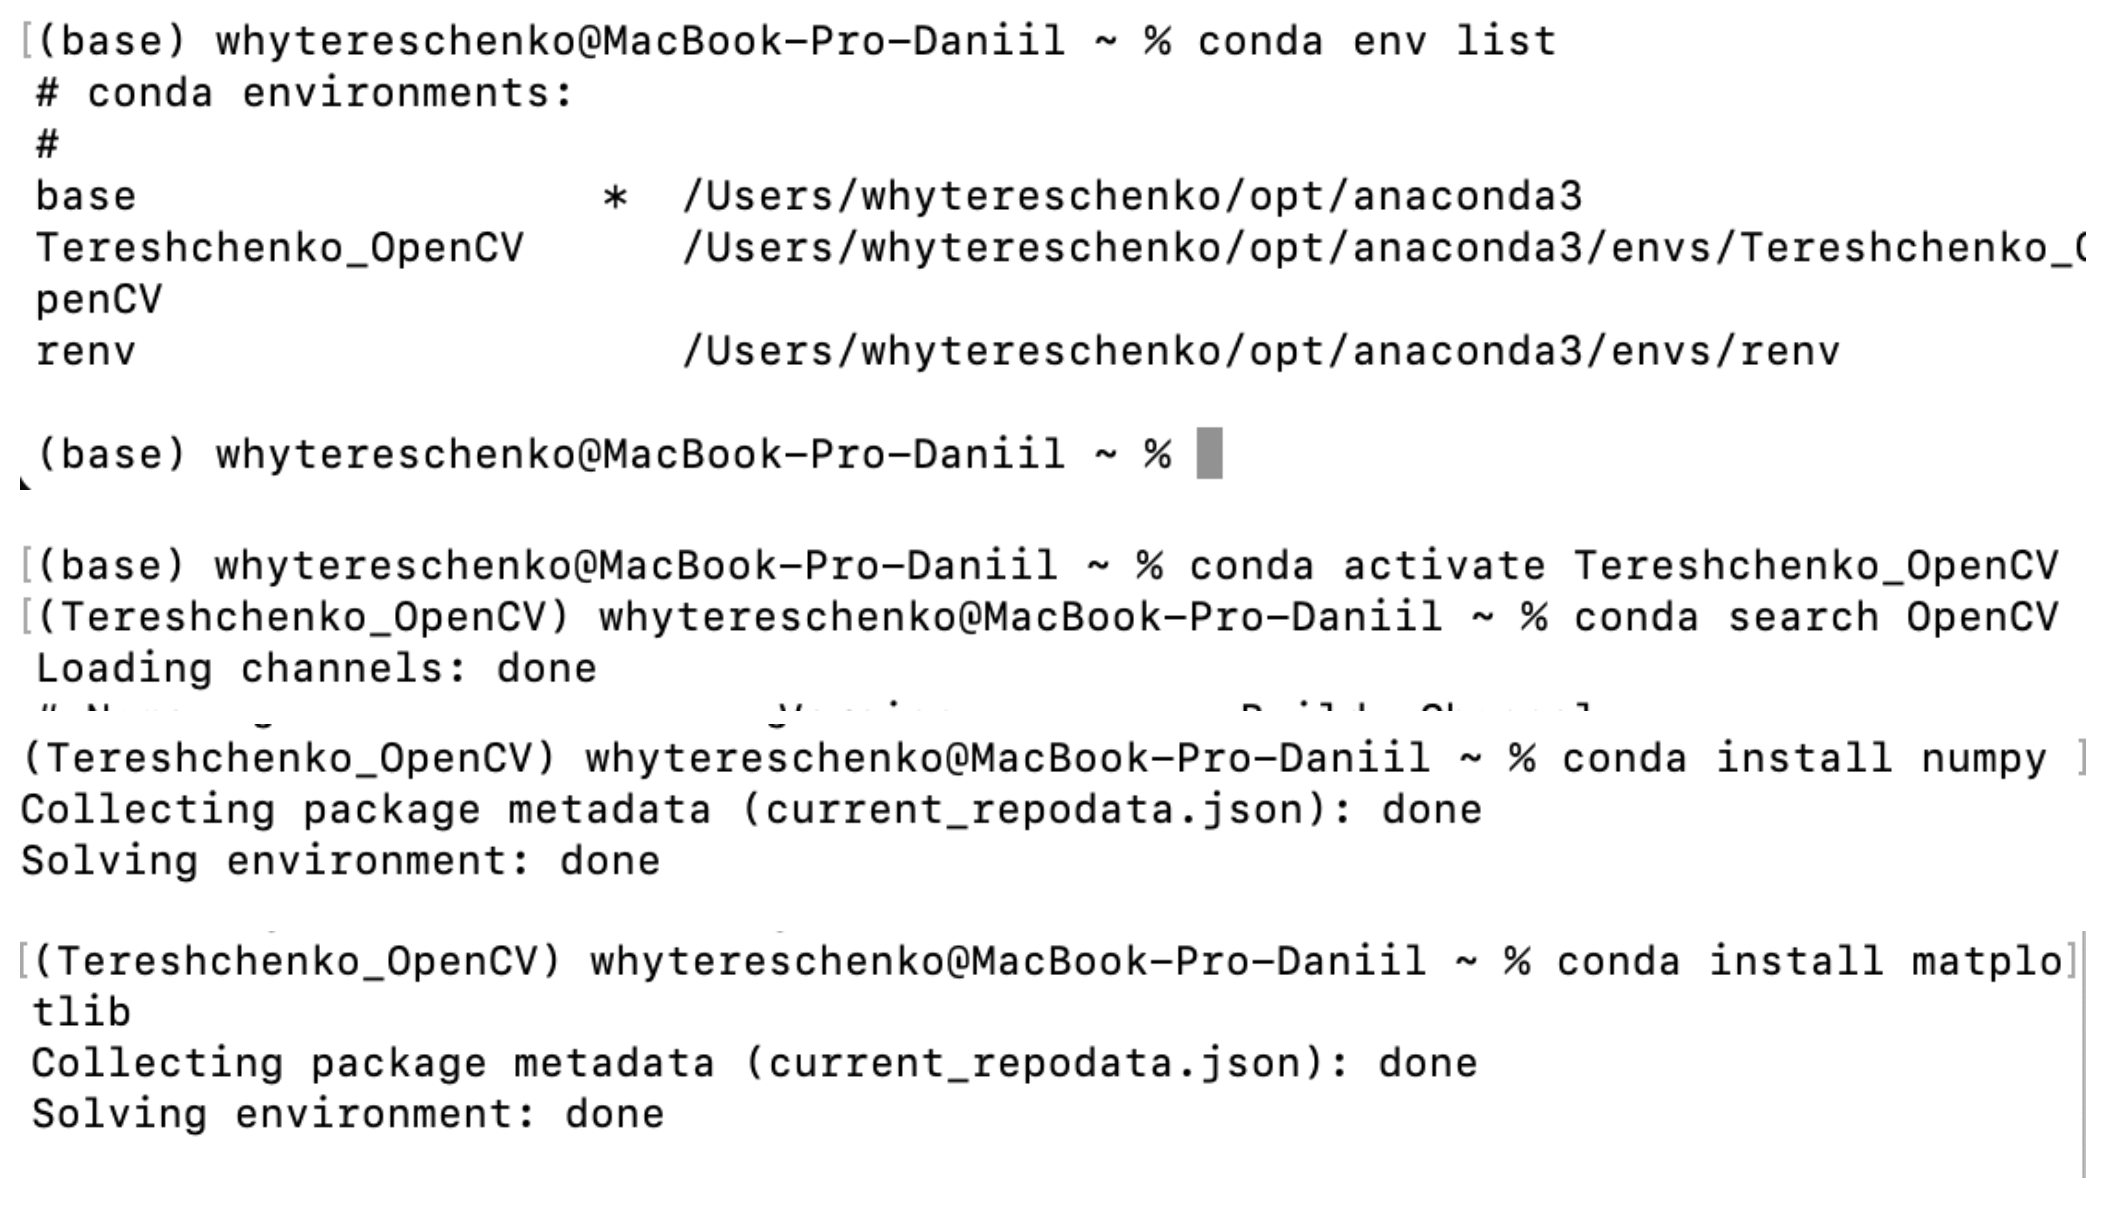

3. Як виконати візуалізацію зображення (див. п.3) засобами `mathplotlib`?  

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Завантажте зображення за допомогою OpenCV
image = cv2.imread('me.png', cv2.IMREAD_GRAYSCALE)

# Перевірте, чи зображення було завантажено успішно
if image is not None:
    # Візуалізація зображення за допомогою Matplotlib
    plt.imshow(image, cmap='gray')  # Встановлення колірної мапи на "сірий" для зображень у відтінках сірого
    plt.title('Зображення')
    plt.axis('off')  # Вимкніть вісі x та y
    plt.show()
else:
    print('Не вдалося завантажити зображення.')

# Запис зображення на диск за допомогою OpenCV
cv2.imwrite('me_s.png', image)

4. Як виконати компіляцію вхідного документа `Jupyter Notebook` із його середовища , не використовуючи інтерфейс командного рядка?
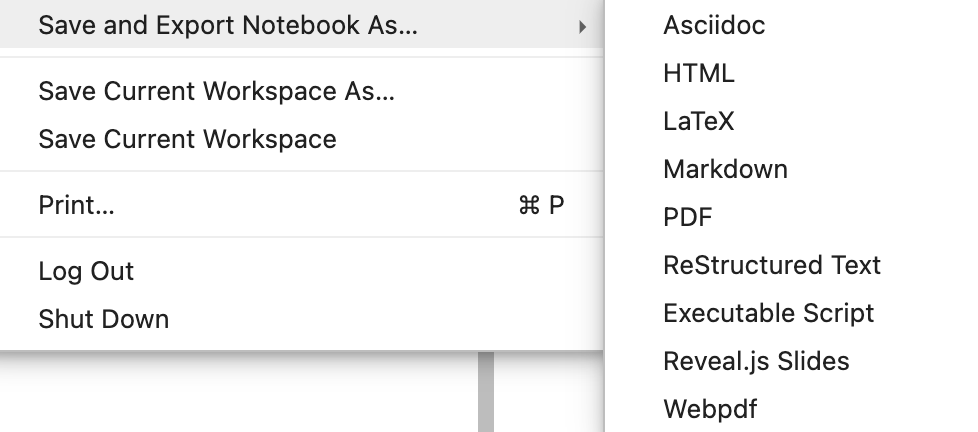. 

## References

1. [Anaconda. (Python distribution)](https://uk.wikipedia.org/wiki/Anaconda_(Python_distribution))
1. [Conda.](https://conda.io/en/latest/)
1. [Научно-издательская система Quarto.](https://data-visualization-blog.netlify.app/posts/quarto/)
1. [Pro Git Book.](https://git-scm.com/book/en/v2)